# Model fitting exercise
 - fitting a forgetting curve by Murdock (1961)
 - code adapted from Myung (2003)'s matlab code
 - using Nelder-Mead optimization algoritm in scipy


> Hyungwook Yim 20220429

In [1]:
import numpy
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats

##  1.  BASIC FIT  
  0. we will fit the exponential function 
  \begin{equation}
    w_0 \times exp(-w_1 \times t)
  \end{equation}
  1. the data
  2. we will first define the function that we want to minimize (= lost function, objective function) 

In [2]:
#### (1) DATA
n = 100 # number of trials per
t = numpy.array([1, 3, 6, 9, 12, 18]) # time points
y = numpy.array([.94, .77, .40, .26, .24, .16]) # proportion of correct
x = n*y # number of correct responses

#### (2) Define objective functions
### (2.1) Exponential objective function for LSE
def exp_lse(w):
  pred = w[0]*numpy.exp(-w[1]*t) # generate model prediction
  SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
  return SSE

### (2.2) Exponential objective function for MLE
def exp_mle(w):
  theta = w[0]*numpy.exp(-w[1]*t) # generate model prediction

  #### Some tricks since the computers usually can't calculate really some numbers
  theta[theta == 0.0] = 1e-32 # prevents the thetas becoming zero
  theta[theta == 1.0] = 1.0 - 1e-32 # prevents the thetas becoming one

  ## For MLE the log-likelihood is estimated for computational convenience
  ## this is because the probability gets really small
  ## and it is hard for the computer to represent the original equation should be:
  #     L = numpy.prod(scipy.stats.binom.pmf(x, n, theta)) # product of binomial likelihoods
  ## but instead we use the log-likelihood as below (now we need to sum since it is a log)
  LL = numpy.sum(numpy.log(scipy.stats.binom.pmf(x, n, theta))) # product of binomial likelihoods
  return -LL # finally we place a minus sign since we have to maximinze it
  


  3. fitting the data to the model using the simplex algorithm
    - simplex (= nelder-mead algorithm)
    - this can be implemented by using the scipy.optimize.minimize() function 
      - *how to use*
      - ***scipy.optimize.minimize( LOSS_FUNCTION, START_POINTS, method)***

In [4]:
#### (3) Optimize the w for the objective function
### (3.1) Exponential using LSE
start_pt = numpy.random.random(2)  # two random number from 0~1
LSE_results = scipy.optimize.minimize(exp_lse, start_pt, method='nelder-mead')

### (3.2) Exponential using MLE
start_pt = numpy.random.random(2)  # two random number from 0~1
MLE_results = scipy.optimize.minimize(exp_mle, start_pt, method='nelder-mead')




  4. plotting the results & checking the fits

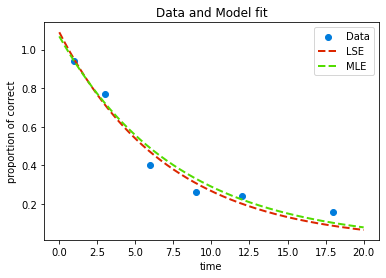

Evaluate by LSE (fit by LSE): 0.016916
Evaluate by LSE (fit by MLE): 0.018569
Evaluate by MLE (fit by LSE): 19.264769
Evaluate by MLE (fit by MLE): 18.666468



In [5]:
#### (4) Plot the fits
model_t = numpy.arange(.01,20.01,.01)
pred_LSE = LSE_results['x'][0]*numpy.exp(-LSE_results['x'][1]*model_t)
pred_MLE = MLE_results['x'][0]*numpy.exp(-MLE_results['x'][1]*model_t)

plt.scatter(t, y, label='Data', color='#007CDC') ### Data
plt.plot(model_t, pred_LSE, label='LSE', color='#DC2600', ls='--', lw=2)
plt.plot(model_t, pred_MLE, label='MLE', color='#53DC00', ls='--', lw=2)
plt.xlabel('time')
plt.ylabel('proportion of correct')
plt.legend()
plt.title('Data and Model fit')
plt.show()
#plt.savefig('modelfit.jpg')

####### Which method gave a better fit?
## compare using LSE (lower is better)
lselse = exp_lse(LSE_results['x']) # 0.016916409922445665
lsemle = exp_lse(MLE_results['x']) # 0.01856442993016297
## compare using MLE (lower is better since we are fitting -LL)
mlelse = exp_mle(LSE_results['x']) # 19.265008673927433
mlemle = exp_mle(MLE_results['x']) # 18.666470249041588

### depends on which method you use for comparison!
print("Evaluate by LSE (fit by LSE): %f\nEvaluate by LSE (fit by MLE): %f\nEvaluate by MLE (fit by LSE): %f\nEvaluate by MLE (fit by MLE): %f\n"%(lselse,lsemle,mlelse,mlemle))



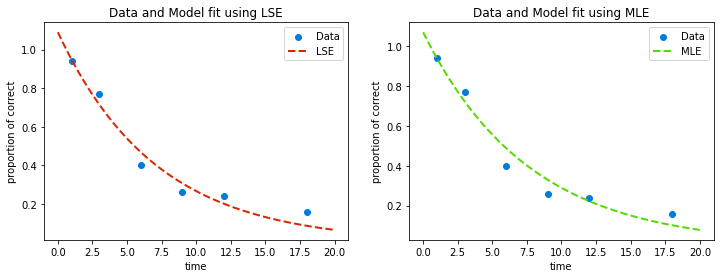

In [6]:
### Alternative way to plot  (plotting it in two separate subplots)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(t, y, label='Data', color='#007CDC') ### Data
plt.plot(model_t, pred_LSE, label='LSE', color='#DC2600', ls='--', lw=2)
plt.xlabel('time')
plt.ylabel('proportion of correct')
plt.legend()
plt.title('Data and Model fit using LSE')
plt.subplot(1,2,2)
plt.scatter(t, y, label='Data', color='#007CDC') ### Data
plt.plot(model_t, pred_MLE, label='MLE', color='#53DC00', ls='--', lw=2)
plt.xlabel('time')
plt.ylabel('proportion of correct')
plt.legend()
plt.title('Data and Model fit using MLE')
plt.show()


----------------------------------
## 2. Overfitting 
  - Model complexity (model flexibility)
    - why an exponential?? is there a better model that fits better?
    - how to get a better fit?
      - (ANS) increase the complexity of the model

  - What we will do here
    - we will compare the exponential to (1) a linear function (simpler), and (2) a polynomial function (complexer)
    - we will use only LSE 


/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_66462/3068479391.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_LSE, 'r', label='exponential', color='#49A007')
/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_66462/3068479391.py:67: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(model_t, pred_comp_LSE, 'r', label='complex', color='#DC2600')


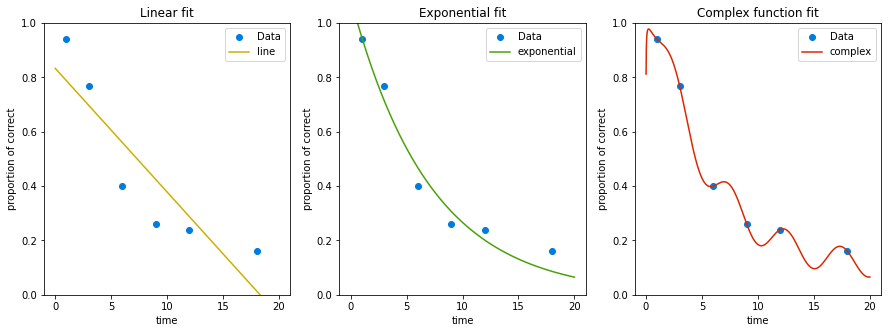

[Results in LSE] 
(1) Linear: 0.104515
(2) Exponential: 0.016916
(3) Complex: 0.000000


In [17]:
#### (5) Objective functions
### (5.1) linear objective function for LSE (simpler than the exponential)
def line_lse(w):  # w = [a, b]. So, y = wx + b 
  pred = w[0]*t + w[1] # generate model prediction
  SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
  return SSE

### (5.2) complex objective function for LSE (complexer than the exponential)
def comp_lse(w):
  pred = w[0]*numpy.exp(-w[1]*t) + w[2] + w[3]*t**(-w[4])*numpy.sin(w[5]*t+w[6]) # generate model prediction
  SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
  return SSE

### (5.3) exponential objective fucntion <- same as in the previous section
def exp_lse(w):
  pred = w[0]*numpy.exp(-w[1]*t) # generate model prediction
  SSE = numpy.sum((y - pred)**2) # calculate SSE (sum of squared errors)
  return SSE


#### (6) Optimize the w for the objective function
### (6.1) Linear using LSE
start_pt = numpy.random.random(2)  # two random number from 
line_res = scipy.optimize.minimize(line_lse, start_pt, method='nelder-mead')

### (6.2) Complex using LSE
start_pt = numpy.random.random(7)  # seven random number from 
comp_res = scipy.optimize.minimize(comp_lse, start_pt, method='nelder-mead')#, tol=1e-30, options={'maxiter': 1e+6})

### (6.3) Exponential using LSE
start_pt = numpy.abs(numpy.random.random(2))*1  # two random number from 0~1
LSE_results = scipy.optimize.minimize(exp_lse, start_pt, method='nelder-mead')



#### (7) Plot the fits
##### model prediction
##### we are using estimated parameters to generate the prediction
model_t = numpy.arange(.01,20.01,.01)
pred_line_LSE  = line_res['x'][0]*model_t + line_res['x'][1] 
# a * model_t + b (a and b will be just optimized)
pred_comp_LSE = comp_res['x'][0]*numpy.exp(-comp_res['x'][1]*model_t) + comp_res['x'][2] + comp_res['x'][3]*model_t**(-comp_res['x'][4])*numpy.sin(comp_res['x'][5]*model_t+comp_res['x'][6])
pred_LSE = LSE_results['x'][0]*numpy.exp(-LSE_results['x'][1]*model_t)


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(t, y, label='Data', color='#007CDC') ### Data
plt.plot(model_t, pred_line_LSE, label='line', color='#CDAF00')
plt.xlabel('time')
plt.ylabel('proportion of correct')
plt.legend()
plt.title('Linear fit')
plt.ylim([0,1])

plt.subplot(1,3,2)
plt.scatter(t, y, label='Data', color='#007CDC') ### Data
plt.plot(model_t, pred_LSE, 'r', label='exponential', color='#49A007')
plt.xlabel('time')
plt.ylabel('proportion of correct')
plt.legend()
plt.title('Exponential fit')
plt.ylim([0,1])

plt.subplot(1,3,3)
plt.scatter(t, y, label='Data', color='#007CDC') ### Data
plt.plot(model_t, pred_comp_LSE, 'r', label='complex', color='#DC2600')
plt.xlabel('time')
plt.ylabel('proportion of correct')
plt.legend()
plt.title('Complex function fit')
plt.ylim([0,1])

plt.show()
#plt.savefig('modelfit.jpg')


####### Which method gave a better fit?
## compare using LSE (lower is better)
### depends on which method you use for comparison!
print("[Results in LSE] ")
print("(1) Linear: %f\n(2) Exponential: %f\n(3) Complex: %f"%(line_lse(line_res['x']),exp_lse(LSE_results['x']),comp_lse(comp_res['x'])))



----------------------------------
## 3. Cross validation

In [18]:
import copy
#### DATA
n = 100 # number of trials per
t = numpy.array([1, 3, 6, 9, 12, 18]) # time points
y = numpy.array([.94, .77, .40, .26, .24, .16]) # proportion of correct
x = n*y # number of correct responses

# Leave One Out Cross Validation (LOOCV)
# using the exponential function
def exp_lse_train(w):
  pred = w[0]*numpy.exp(-w[1]*t_train) # generate model prediction
  SSE = numpy.sum((y_train - pred)**2) # calculate SSE (sum of squared errors)
  return SSE

def exp_lse_test(w):
  pred = w[0]*numpy.exp(-w[1]*t_test) # generate model prediction
  SSE = numpy.sum((y_test - pred)**2) # calculate SSE (sum of squared errors)
  return SSE


def exp_lse_pre(w):
  pred = w[0]*numpy.exp(-w[1]*t) # generate model prediction
  SSE = numpy.sum((y_test - pred)**2) # calculate SSE (sum of squared errors)
  return pred

test_sse = []
test_pre = []
#### inefficient way of implementing a CV algorithm
#### there is a function for this from sklearn.model_selection import cross_val_score
#### but this code is easier(helpful?) to understand the process
for i in range(len(t)):
  temp_t = copy.deepcopy(list(t))
  temp_y = copy.deepcopy(list(y))
  t_test  = numpy.array(temp_t[i])
  y_test  = numpy.array(temp_y[i])
  del temp_t[i]
  del temp_y[i]
  t_train =  numpy.array(temp_t)
  y_train =  numpy.array(temp_y)
  print(i, t_train, y_train)
   
  start_pt = numpy.abs(numpy.random.random(2))  # two random number from 0~1
  res = scipy.optimize.minimize(exp_lse_train, start_pt, method='nelder-mead')
  test_sse.append(exp_lse_test(res['x'])) ### saving SSE (or LSE)
  test_pre.append(exp_lse_pre(res['x'])) ### saving predictions of the fit model
  print(exp_lse_pre(res['x']))
  print('________________________________________________________')

print("Results (mean error): %f"%numpy.mean(test_sse))

0 [ 3  6  9 12 18] [0.77 0.4  0.26 0.24 0.16]
[0.97630119 0.72842499 0.46944679 0.30254356 0.19497972 0.08098275]
________________________________________________________
1 [ 1  6  9 12 18] [0.94 0.4  0.26 0.24 0.16]
[0.91869397 0.69242655 0.45308323 0.29647103 0.19399321 0.0830606 ]
________________________________________________________
2 [ 1  3  9 12 18] [0.94 0.77 0.26 0.24 0.16]
[0.95311419 0.73267958 0.49381902 0.33282929 0.22432375 0.101902  ]
________________________________________________________
3 [ 1  3  6 12 18] [0.94 0.77 0.4  0.24 0.16]
[0.94102705 0.72346381 0.4876844  0.32874634 0.22160675 0.10069945]
________________________________________________________
4 [ 1  3  6  9 18] [0.94 0.77 0.4  0.26 0.16]
[0.95630623 0.70995078 0.4541247  0.29048386 0.18580992 0.07602609]
________________________________________________________
5 [ 1  3  6  9 12] [0.94 0.77 0.4  0.26 0.24]
[0.95899741 0.7114001  0.45452591 0.29040452 0.18554451 0.07574214]
_______________________________

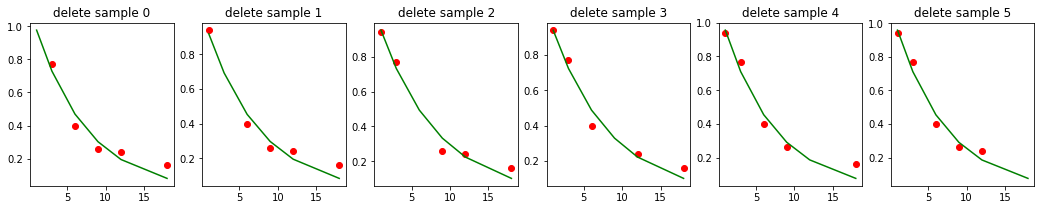

In [19]:
#### Plot it 
t = numpy.array([1, 3, 6, 9, 12, 18]) # time points
plt.figure(figsize=(18,3))
for i in range(len(t)):
  temp_t = copy.deepcopy(list(t))
  temp_y = copy.deepcopy(list(y))
  t_test  = numpy.array(temp_t[i])
  y_test  = numpy.array(temp_y[i])
  del temp_t[i]
  del temp_y[i]
  t_train =  numpy.array(temp_t)
  y_train =  numpy.array(temp_y)
  start_pt = numpy.abs(numpy.random.random(2))*1  # two random number from 0~1
  res = scipy.optimize.minimize(exp_lse_train, start_pt, method='nelder-mead')
  plt.subplot(1,6,i+1)
  plt.plot(t_train, y_train, 'ro')
  plt.plot(t, exp_lse_pre(res['x']), 'g')
  plt.title('delete sample '+str(i))
